<h1 style="color:Green;">Week 2 Lab - due by 17th July, 2022 (11:59 pm CDT )</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/1IsoKGNILvIqfo_yzBJYTCIf9qg4YysTIOFrJix6jYDI/edit#slide=id.g11b032e97d3_0_0">[Week 2 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to practice portfolio hedging and risk management</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from matplotlib.ticker import FuncFormatter
from scipy.stats import t, laplace, expon, uniform, norm
import statsmodels.api as sm
import random
import pandas_datareader as pdr

<h2 style="color:Green;">Problem 1: Exploring Sector ETFs</h2><br/>

A sector exchange-traded fund (ETF) is a pooled investment vehicle that invests specifically in the stocks and securities of a particular industry or sector, typically identified in the fund's title. For instance, a sector ETF may track a representative basket of stocks from a specific economic sector.<br>
<br>
Here is the list of sector ETFs:
<ul>
  <li>Healthcare: XLV</li>
  <li>Utilities: XLU</li>
  <li>Consumer Staples: XLP</li>
  <li>Materials: XLB</li>
  <li>Financials: XLF</li>
  <li>Energy: XLE</li>
  <li>Real Estate: XLRE</li>
  <li>Information Technology: XLK</li>
  <li>Consumer Discretionary: XLY</li>
  <li>Communication Services: XLC</li>
  <li>Industrials: XLI</li>
</ul>

Suppose that a portfolio manager is interested in concentrating the clients' assets in two sector ETFs. You, as a quantitative analyst generated the summary statistics table below to help with the manager's decision.
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [2]:
ETF_SYMBOLS = ['XLV','XLU','XLP','XLB','XLF','XLE','XLRE','XLK','XLY','XLI','XLC'] # Enter the ticker symbols here
TAU = 5         # Enter duration of data you want from Yahoo Finance
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
etfPxList = pdr.DataReader(ETF_SYMBOLS, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
etfLogRetList = np.log(etfPxList).diff().dropna()
sum_stats = pd.DataFrame({'mean':etfLogRetList.mean(), 'sd': etfLogRetList.std(), 'skewness':etfLogRetList.skew(), 'excess kurtosis':etfLogRetList.kurtosis()})
sum_stats

,mean,sd,skewness,excess kurtosis
Symbols,,,,
XLV,0.000486,0.012567,-0.430122,10.590087
XLU,0.000447,0.014525,-0.259035,17.788349
XLP,0.000453,0.011285,-0.526280,16.293667
XLB,0.000284,0.015736,-0.613286,9.886559
XLF,0.000228,0.017677,-0.595474,13.544951
XLE,0.000123,0.024177,-0.943492,13.569141
XLRE,0.000385,0.015605,-1.504059,20.688113
XLK,0.000646,0.017874,-0.574168,9.010976
XLY,0.000293,0.016120,-0.992642,9.278614


a) Based on the summary statistics of the ETF's log returns, which two sector ETFs would you recommend to the portfolio manager? (Hint: compare the mean, sd, skewness, and excess kurtosis of each ETF's log return)

I would recommend ETF XLK and XLV to the portfolio manager.<br>First, the expected return (mean) of ETF XLK and XLV are the top two in all of these ETFs.<br>Second, although excess kurtosis for XLV is somewhat great (which means it has thicker tails than normal distribution and more extreme values), the low standard deviation accounts for lower risk and volatility for XLV. For XLK, the lowest excess kurtosis in all of these ETFs allows it to have less extreme values, making it less risky.<br>Third, both XLK and XLV are moderately skewed, so there's no need to worry about very extreme losses.

b) If the portfolio manager's objective is to achieve the maximum return with minimum risk, which two sector ETFs would you recommend to her? How does this differ from your recommendation in a)? <br>
(Hint 1: consider reward-to-risk ratio)<br>
(Hint 2:You can save time by using the following code chunk to automate any metric computation)

In [3]:
sum_stats['Reward/Risk Ratio']=etfLogRetList.mean()/etfLogRetList.std()
sum_stats

,mean,sd,skewness,excess kurtosis,Reward/Risk Ratio
Symbols,,,,,
XLV,0.000486,0.012567,-0.430122,10.590087,0.038692
XLU,0.000447,0.014525,-0.259035,17.788349,0.030758
XLP,0.000453,0.011285,-0.526280,16.293667,0.040164
XLB,0.000284,0.015736,-0.613286,9.886559,0.018030
XLF,0.000228,0.017677,-0.595474,13.544951,0.012883
XLE,0.000123,0.024177,-0.943492,13.569141,0.005096
XLRE,0.000385,0.015605,-1.504059,20.688113,0.024702
XLK,0.000646,0.017874,-0.574168,9.010976,0.036152
XLY,0.000293,0.016120,-0.992642,9.278614,0.018187


From the data points generated above, I would recommend XLV and XLP as these two has the two top Reward/Risk Ratio. This differs from my previous recommendation because the Reward/Risk Ratio assumes standard deviation for measurement of the risk without accounting for excess kurtosis or skewness as I did above.

c) What is one visualiztions that you can use to evaluate multiple ETF's before including any of them in your portfolio? (Hint: visualization techniques are suggested in earlier chapters)<br>
You can just name the visualization method. Extra credit is given to those who implement the visuaization in the following code chunk.

Correlation Heatmap

Text(0.5, 1.0, 'Correlations Between Stock Log Return')

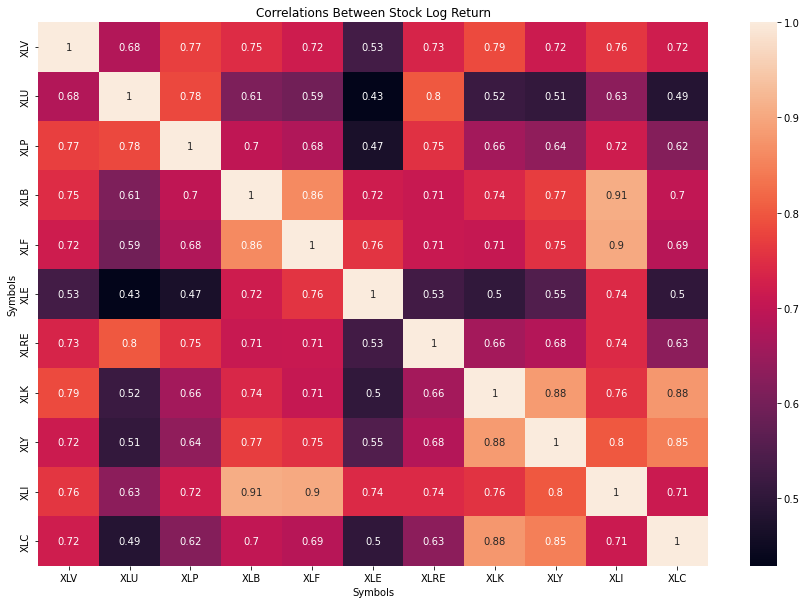

In [4]:
# visualizing correlation heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(etfLogRetList.corr(),annot=True)
plt.title("Correlations Between Stock Log Return")

<h2 style="color:Green;">Problem 2: Evaluating Portfolio Risks</h2><br/>

After adding two sector ETFs from part a), the portoflio manager wants to add one more asset into her portfolio, but this time, she wants an asset with daily risks no more than 3% at a 10% significance level. You have become the portoflio manager's favorite quantitative analyst since the previous task, and have been asked to suggest an asset to add to her portfolio with follow-through analysis. Please follow the instructions specified in each part of this problem to deliver your suggestion and analysis.
<br><br>
Notice that any assets can be selected, and not just stocks. For example, cryptocurrency and foreign exchange instruments can be suggested as well. Some relatively new cryptocurrencies (e.g., Solana, USD Coin) only have complete data dating back to three or four years ago, so setting the duration of data further back than these dates may result in inaccurate representation of their relationships.

a) Please specify your asset's ticker and their data duration here. 

In [5]:
ASSET_TICKER = 'JEPI'     # Enter the asset's ticker here
TAU = 5              # duration span (in years) of observed data

Run the following code chunk. <br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [6]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
# storing adjusted stock prices into a variable 
assetPx = pdr.get_data_yahoo(ASSET_TICKER, START_DATE, END_DATE)['Adj Close'] 
# converting prices to log returns and removing NaN values
assetLogRet = np.log(assetPx).diff().dropna()

b) Run the following code chunk and observe the histogram for the asset's log returns. Describe its mean, standard deviation, and shape.
<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

Text(0, 0.5, 'Density')

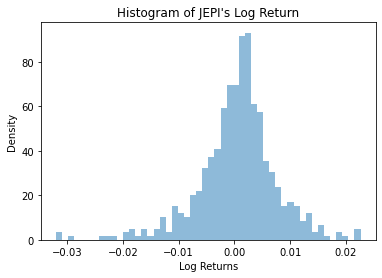

In [20]:
_, bins, _= plt.hist(assetLogRet, bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + ASSET_TICKER + "'s Log Return")
plt.xlabel("Log Returns"); plt.ylabel("Density")

The mean is around 0.00 log return. While the graph has a slightly longer left tail than the right tail (which makes it slightly negatively skewed), the shape is relatively normal (the log returns for JEPI doesn't have extreme return values). The spread is actually a bit great as the graph varies from -0.03 to 0.02 especially compared to other stocks I've seen before.

c) Run the following code chunk and select one of the three probabiltiy distribution curves that you think best fits the histogram. Name the probability distribution and its parameters (e.g., degrees of freedom, location, scale).<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

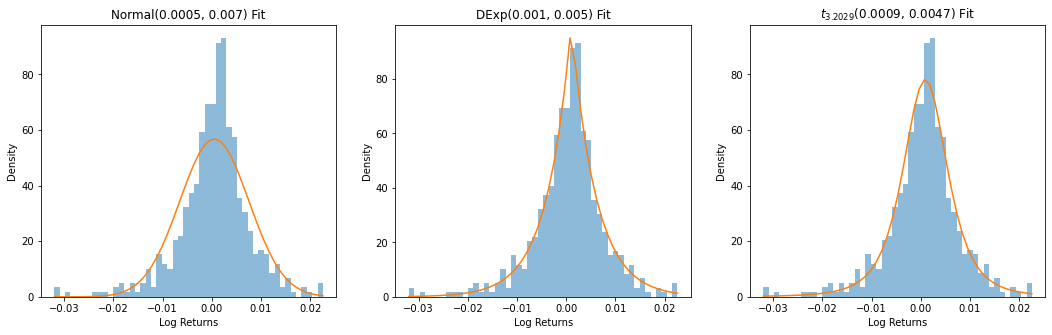

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# storing histogram bins and plotting the first histogram
_, bins, _ = axs[0].hist(assetLogRet, bins=50, density=1, alpha=0.5)

#---------------------------w/ Normal PDF-----------------------------
mu, sigma = stats.norm.fit(assetLogRet)
axs[0].plot(bins, stats.norm.pdf(bins, mu, sigma), label='normal pdf')
axs[0].set_title("Normal("+str(np.round(mu, 4))+', '+str(np.round(sigma, 4))+") Fit")

#---------------------------w/ Double Exponential PDF-----------------------------
axs[1].hist(assetLogRet, bins=50, density=1, alpha=0.5)
loc_dexp, scale_dexp = stats.laplace.fit(assetLogRet)
axs[1].plot(bins, laplace.pdf(bins, loc_dexp, scale_dexp), label='double exponential pdf')
axs[1].set_title("DExp("+str(np.round(loc_dexp, 4))+', '+str(np.round(scale_dexp, 4))+") Fit")

#---------------------------w/ Student-t PDF-----------------------------
axs[2].hist(assetLogRet, bins=50, density=1, alpha=0.5)
df_t, loc_t, scale_t = stats.t.fit(assetLogRet)
axs[2].plot(bins, t.pdf(bins, df_t, loc_t, scale_t), label='student-t pdf')
axs[2].set_title("$t_{"+str(np.round(df_t, 4))+"}$"+"("+str(np.round(loc_t, 4))+', '+str(np.round(scale_t, 4))+") Fit")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns', ylabel='Density')

Double Exponential Pdf fits it best. It accounts almost perfectly for the tail and the center height.

d)  If you cannot differentiate which distribution is a better fit from part b), run the follow code to fit QQ plots to the asset's log return quantiles. Then select one of the three QQ plots that you think best fits the log return quantiles. What is the theoretical distribution in this QQ plot? Is this distribution same as the one you selected in part b)?<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

Text(0.5, 1.0, "Student-t QQ Plot of JEPI's Log Return")

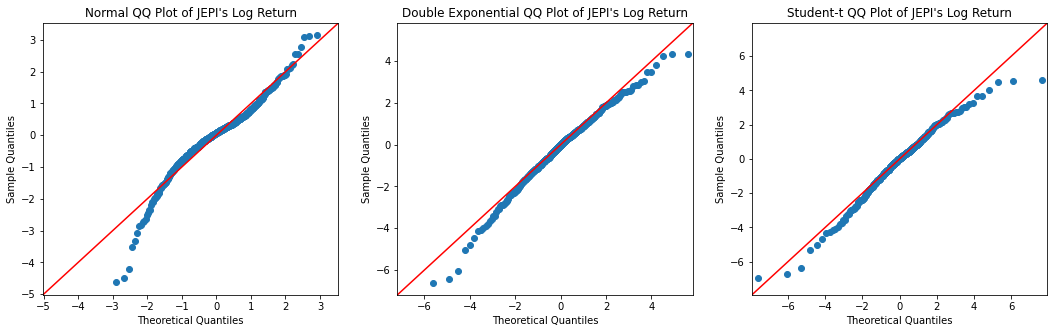

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#---------------------------w/ Normal QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.norm, fit=True, line='45', ax=axs[0])
axs[0].set_title("Normal QQ Plot of " + ASSET_TICKER + "'s Log Return")

#---------------------------w/ Double Exponential QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.laplace, fit=True, line='45', ax=axs[1])
axs[1].set_title("Double Exponential QQ Plot of " + ASSET_TICKER + "'s Log Return")

#---------------------------w/ Student-t QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.t, fit=True, line='45', ax=axs[2])
axs[2].set_title("Student-t QQ Plot of " + ASSET_TICKER + "'s Log Return")

Double Exponential fits it best, because from the graphs above we can see that the theoretical quantiles of Double Exponential Plot most fit with the sample quantiles on the line. This is the same as my conclusion from part (b).

e)You are going to make a table summarizing the rVaR and rES at each significant levels with their respective quantiles. Of the code chunks (i), (ii), and (iii), run the appropriate code chunk to get the correct risk information.
<ul>
  <li type = "i">Run if Normal Distribution is selected in part c)</li>
  <li type = "i">Run if Double Exponential Distribution is selected in part c)</li>
  <li type = "i">Run if Student-t Distribution is selected in part c)</li>
</ul>

(i) <p style="color:blue;">IF YOU SELECTED THE NORMAL DISTRIBUTION IN PART c), THEN RUN THIS CHUNK.</p>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [10]:
quantile_10 = norm.ppf(0.1, mu, sigma)
quantile_5 = norm.ppf(0.05, mu, sigma)
quantile_1 = norm.ppf(0.01, mu, sigma)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(norm.rvs(loc = mu, scale = sigma, size = 10000000))-1)      # enter code before this comment

(ii) <p style="color:blue;">IF YOU SELECTED THE DOUBLE EXPONENTIAL DISTRIBUTION IN PART c), THEN RUN THIS CHUNK.</p>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [16]:
quantile_10 = laplace.ppf(0.1, loc_dexp, scale_dexp)
quantile_5 = laplace.ppf(0.05, loc_dexp, scale_dexp)
quantile_1 = laplace.ppf(0.01, loc_dexp, scale_dexp)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(laplace.rvs(loc = loc_dexp, scale = scale_dexp, size = 10000000))-1)      # enter code before this comment

(iii) <p style="color:blue;">IF YOU SELECTED THE STUDENT-T DISTRIBUTION IN PART c), THEN RUN THIS CHUNK.</p>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [12]:
quantile_10 = t.ppf(0.1, df_t, loc_t, scale_t)
quantile_5 = t.ppf(0.05, df_t, loc_t, scale_t)
quantile_1 = t.ppf(0.01, df_t, loc_t, scale_t)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(t.rvs(df = df_t, loc = loc_t, scale = scale_t, size = 10000000))-1)      

Run the following code chunk to get the relative Value-at-Risk (rVaR) at each significance level.
<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [17]:
rVaR_10 = -(np.exp(quantile_10)-1)     
rVaR_5 = -(np.exp(quantile_5)-1)     
rVaR_1 = -(np.exp(quantile_1)-1)    
rVaR = [rVaR_10, rVaR_5, rVaR_1] 

Run the following code chunk to get the relative Expected Shortfall (ES) at each significance level.
<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [18]:
rES_10 = np.mean(simLoss[simLoss>rVaR_10])   
rES_5 = np.mean(simLoss[simLoss>rVaR_5])      
rES_1 = np.mean(simLoss[simLoss>rVaR_1])      
rES = [rES_10, rES_5, rES_1] 

Run the following code chunk to output the risk summary table.

In [19]:
pd.DataFrame({'Significance Level': ['10%', '5%', '1%'], 'Quantile': [quantile_10, quantile_5, quantile_1], 'rVaR': [rVaR_10, rVaR_5, rVaR_1], 'rES':[rES_10, rES_5, rES_1]})

,Significance Level,Quantile,rVaR,rES
0,10%,-0.006956,0.006932,0.011844
1,5%,-0.010404,0.010350,0.015245
2,1%,-0.018411,0.018242,0.023093


f) The portfolio manager tells you that she is planning to invest $95000 into the stock that you recommended in this problem, and wants to know at least how much (in dollar amount) she has to set aside to sustain the loss that occurrs at a 10% significance level. What would you tell her?

I would tell her to set aside $95000$ $*$ $0.0118$ $=$ $1710$ dollars to sustain the loss, as the expected shortfall at a $10$ percent significance level is $0.0118$ and the total investment times that percentage is the absolute expected shortfall.

g) She also wants to know on average, how much (in percentage) of her portfolio should she size in to sustain the loss that occurrs at a 5% significance level. What would you tell her?

I would tell her she should size in $1.52$ percent of her portfolio (on average) to sustain the loss that occurs at a 5 percent significance level.